In [1]:
#pip install --upgrade jupyter_client


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 150)


In [4]:
path = "/content/drive/MyDrive/NEW_HEALTHCARE/"


In [5]:
df_allergies = pd.read_csv(path + "allergies.csv")
df_careplans = pd.read_csv(path + "careplans.csv")
df_conditions = pd.read_csv(path + "conditions.csv")
df_devices = pd.read_csv(path + "devices.csv")
df_encounters = pd.read_csv(path + "encounters.csv")
df_imaging = pd.read_csv(path + "imaging_studies.csv")
df_immunizations = pd.read_csv(path + "immunizations.csv")
df_medications = pd.read_csv(path + "medications.csv")
df_observations = pd.read_csv(path + "observations.csv")
df_orgs = pd.read_csv(path + "organizations.csv")
df_patients = pd.read_csv(path + "patients.csv")
df_payer_trans = pd.read_csv(path + "payer_transitions.csv")
df_payers = pd.read_csv(path + "payers.csv")
df_procedures = pd.read_csv(path + "procedures.csv")
df_providers = pd.read_csv(path + "providers.csv")


In [6]:
datasets = {
    "allergies": df_allergies,
    "careplans": df_careplans,
    "conditions": df_conditions,
    "devices": df_devices,
    "encounters": df_encounters,
    "imaging_studies": df_imaging,
    "immunizations": df_immunizations,
    "medications": df_medications,
    "observations": df_observations,
    "organizations": df_orgs,
    "patients": df_patients,
    "payer_transitions": df_payer_trans,
    "payers": df_payers,
    "procedures": df_procedures,
        "providers": df_providers
}


In [7]:
for name, df in datasets.items():
    print(f"\n===== {name.upper()} =====")
    print(df.shape)
    print(df.head(3))
    print(df.isna().sum())   # missing values check



===== ALLERGIES =====
(597, 6)
        START STOP                               PATIENT                             ENCOUNTER       CODE        DESCRIPTION
0  1982-10-25  NaN  76982e06-f8b8-4509-9ca3-65a99c8650fe  b896bf40-8b72-42b7-b205-142ee3a56b55  300916003      Latex allergy
1  1982-10-25  NaN  76982e06-f8b8-4509-9ca3-65a99c8650fe  b896bf40-8b72-42b7-b205-142ee3a56b55  300913006  Shellfish allergy
2  2002-01-25  NaN  71ba0469-f0cc-4177-ac70-ea07cb01c8b8  7be1a590-4239-4826-9872-031327f3c368  419474003   Allergy to mould
START            0
STOP           533
PATIENT          0
ENCOUNTER        0
CODE             0
DESCRIPTION      0
dtype: int64

===== CAREPLANS =====
(3483, 9)
                                     Id       START        STOP                               PATIENT                             ENCOUNTER  \
0  d2500b8c-e830-433a-8b9d-368d30741520  2010-01-23  2012-01-23  034e9e3b-2def-4559-bb2a-7850888ae060  d0c40d10-8d87-447e-836e-99d26ad52ea5   
1  07d9ddd8-dfa1-4e43-

In [8]:
# Missing Value Handling (Patients Dataset)
# --------------------------
df = datasets["patients"]


In [9]:
# Age → numerical → fill with median
if "Age" in df.columns:
    df["Age"].fillna(df["Age"].median(), inplace=True)

# Gender → categorical → fill with mode
if "Gender" in df.columns:
    df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)

# Blood Type → categorical → fill with mode
if "Blood Type" in df.columns:
    df["Blood Type"].fillna(df["Blood Type"].mode()[0], inplace=True)

# Medical Condition → categorical → fill with 'Unknown'
if "Medical Condition" in df.columns:
    df["Medical Condition"].fillna("Unknown", inplace=True)

# Admission/Discharge Dates → forward fill
for col in ["Date of Admission", "Discharge Date"]:
    if col in df.columns:
        df[col].fillna(method="ffill", inplace=True)

# Billing Amount → numerical → fill with median
if "Billing Amount" in df.columns:
    df["Billing Amount"].fillna(df["Billing Amount"].median(), inplace=True)

# Medication → categorical → fill with 'Unknown'
if "Medication" in df.columns:
    df["Medication"].fillna("Unknown", inplace=True)

# Test Results → numerical → fill with mean
if "Test Results" in df.columns:
    df["Test Results"].fillna(df["Test Results"].mean(), inplace=True)

# Replace updated patients dataframe back
datasets["patients"] = df


# EDA (on patients dataset)


In [10]:
# Missing values check
print("Remaining Missing Values:\n", df.isnull().sum())


Remaining Missing Values:
 Id                        0
BIRTHDATE                 0
DEATHDATE              1000
SSN                       0
DRIVERS                 213
PASSPORT                273
PREFIX                  244
FIRST                     0
LAST                      0
SUFFIX                 1159
MAIDEN                  840
MARITAL                 380
RACE                      0
ETHNICITY                 0
GENDER                    0
BIRTHPLACE                0
ADDRESS                   0
CITY                      0
STATE                     0
COUNTY                    0
ZIP                     543
LAT                       0
LON                       0
HEALTHCARE_EXPENSES       0
HEALTHCARE_COVERAGE       0
dtype: int64


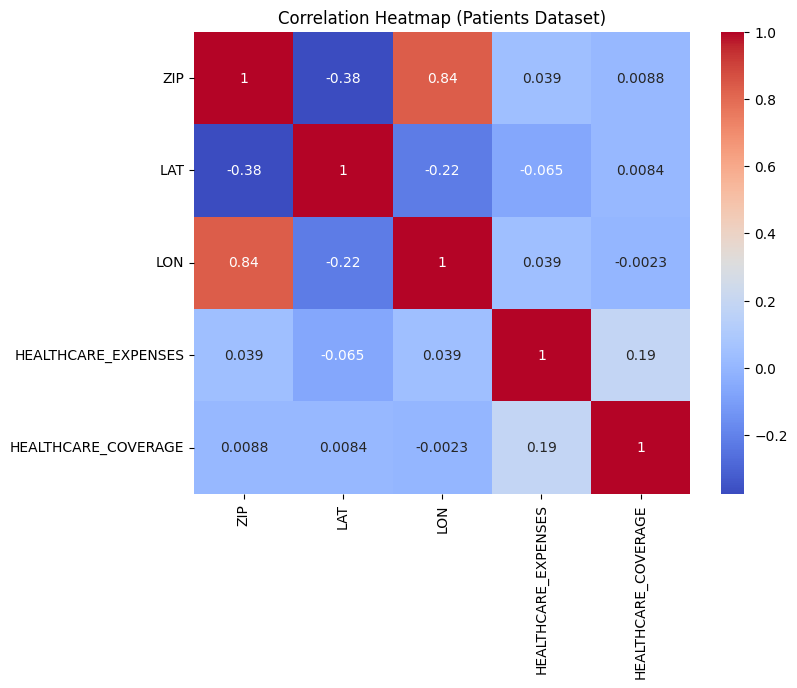

In [11]:
# Distribution of Age
if "Age" in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df["Age"], bins=30, kde=True)
    plt.title("Age Distribution")
    plt.show()

# Gender countplot
if "Gender" in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(x="Gender", data=df)
    plt.title("Gender Distribution")
    plt.show()

# Correlation heatmap for numeric columns
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Patients Dataset)")
plt.show()


In [12]:
eda_datasets = ["conditions", "medications", "observations", "encounters",
                "allergies", "careplans", "immunizations", "procedures"]



===== EDA for CONDITIONS =====
Shape: (8376, 6)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8376 entries, 0 to 8375
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   START        8376 non-null   object
 1   STOP         4565 non-null   object
 2   PATIENT      8376 non-null   object
 3   ENCOUNTER    8376 non-null   object
 4   CODE         8376 non-null   int64 
 5   DESCRIPTION  8376 non-null   object
dtypes: int64(1), object(5)
memory usage: 392.8+ KB
None

Missing values:
START             0
STOP           3811
PATIENT           0
ENCOUNTER         0
CODE              0
DESCRIPTION       0
dtype: int64

Descriptive statistics (numeric):
               CODE
count  8.376000e+03
mean   1.949886e+12
std    2.219533e+13
min    1.734006e+06
25%    5.374101e+07
50%    1.270130e+08
75%    2.833710e+08
max    3.685810e+14

Top 5 values for START:
START
1990-02-05    8
2017-03-21    8
2016-10-08    8
1960-08-0

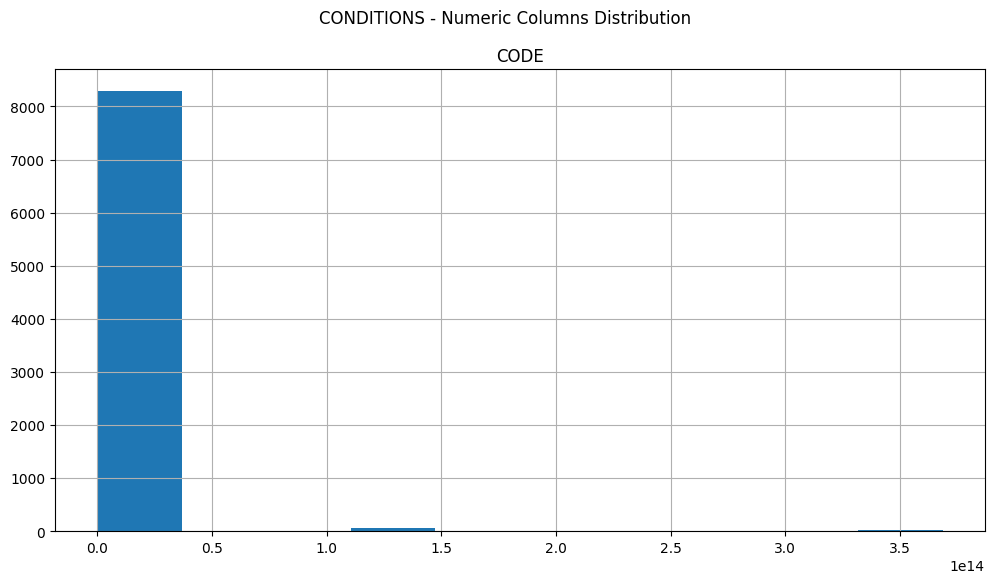


===== EDA for MEDICATIONS =====
Shape: (42989, 13)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42989 entries, 0 to 42988
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   START              42989 non-null  object 
 1   STOP               41094 non-null  object 
 2   PATIENT            42989 non-null  object 
 3   PAYER              42989 non-null  object 
 4   ENCOUNTER          42989 non-null  object 
 5   CODE               42989 non-null  int64  
 6   DESCRIPTION        42989 non-null  object 
 7   BASE_COST          42989 non-null  float64
 8   PAYER_COVERAGE     42989 non-null  float64
 9   DISPENSES          42989 non-null  int64  
 10  TOTALCOST          42989 non-null  float64
 11  REASONCODE         31872 non-null  float64
 12  REASONDESCRIPTION  31872 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 4.3+ MB
None

Missing values:
START                    0
S

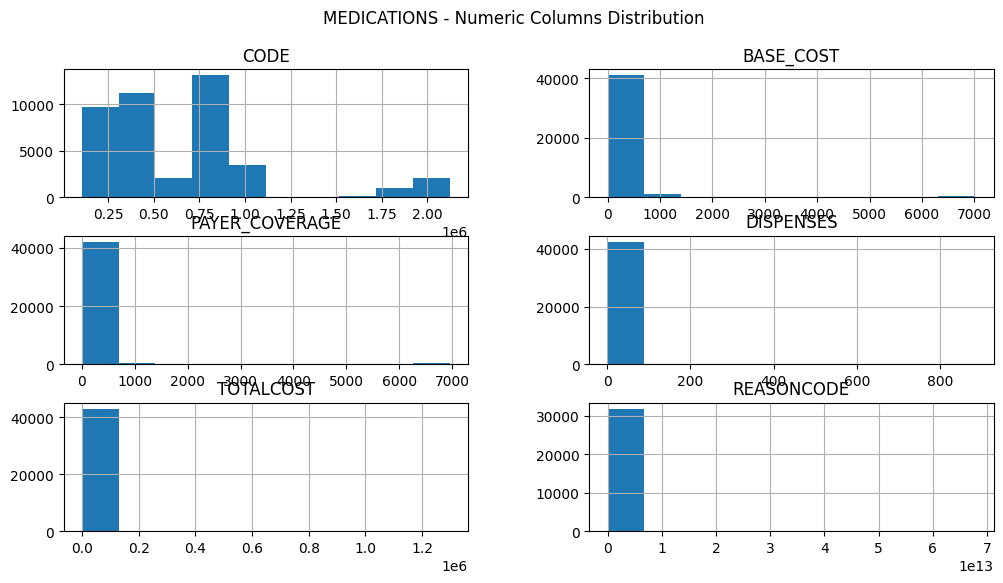

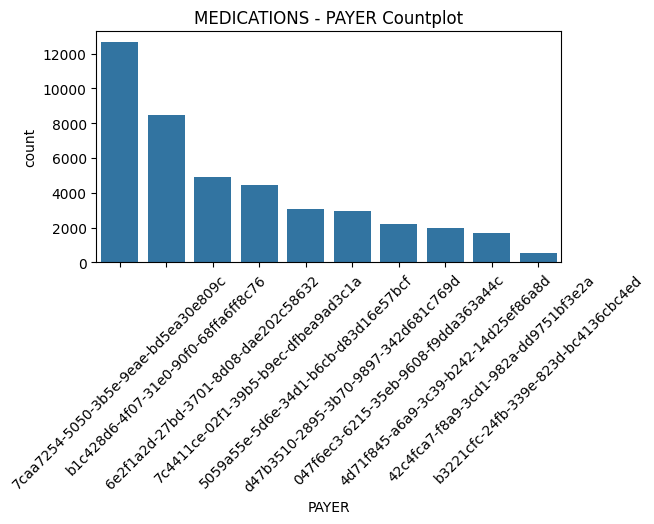


===== EDA for OBSERVATIONS =====
Shape: (299697, 8)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299697 entries, 0 to 299696
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   DATE         299697 non-null  object
 1   PATIENT      299697 non-null  object
 2   ENCOUNTER    269334 non-null  object
 3   CODE         299697 non-null  object
 4   DESCRIPTION  299697 non-null  object
 5   VALUE        299697 non-null  object
 6   UNITS        286962 non-null  object
 7   TYPE         299697 non-null  object
dtypes: object(8)
memory usage: 18.3+ MB
None

Missing values:
DATE               0
PATIENT            0
ENCOUNTER      30363
CODE               0
DESCRIPTION        0
VALUE              0
UNITS          12735
TYPE               0
dtype: int64

Descriptive statistics (numeric):
                        DATE                               PATIENT                             ENCOUNTER     CODE  \
count         

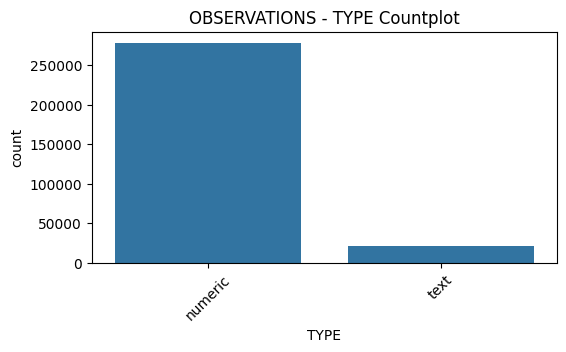


===== EDA for ENCOUNTERS =====
Shape: (53346, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53346 entries, 0 to 53345
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53346 non-null  object 
 1   START                53346 non-null  object 
 2   STOP                 53346 non-null  object 
 3   PATIENT              53346 non-null  object 
 4   ORGANIZATION         53346 non-null  object 
 5   PROVIDER             53346 non-null  object 
 6   PAYER                53346 non-null  object 
 7   ENCOUNTERCLASS       53346 non-null  object 
 8   CODE                 53346 non-null  int64  
 9   DESCRIPTION          53346 non-null  object 
 10  BASE_ENCOUNTER_COST  53346 non-null  float64
 11  TOTAL_CLAIM_COST     53346 non-null  float64
 12  PAYER_COVERAGE       53346 non-null  float64
 13  REASONCODE           13777 non-null  float64
 14  REASONDESCRIPTION    13777 n

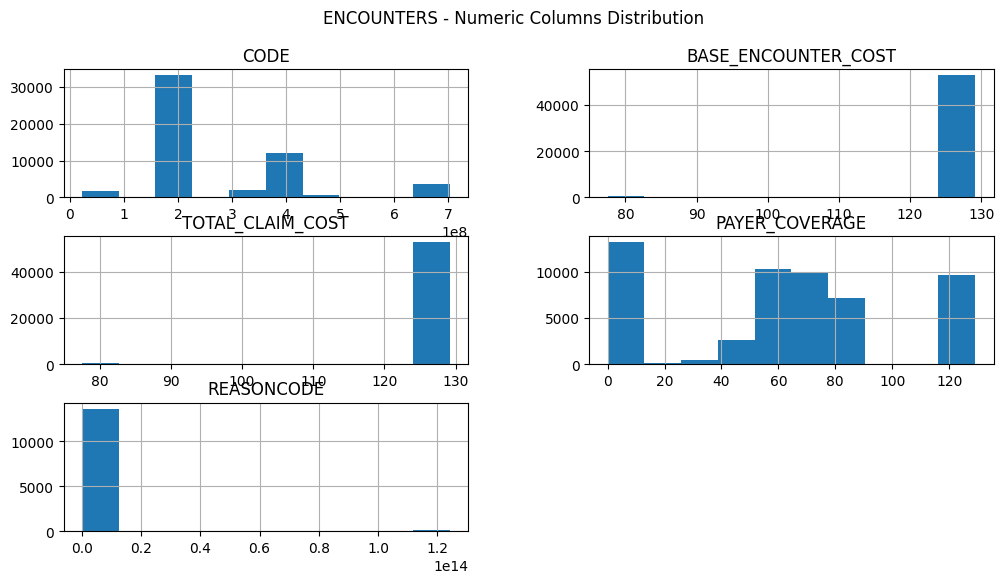

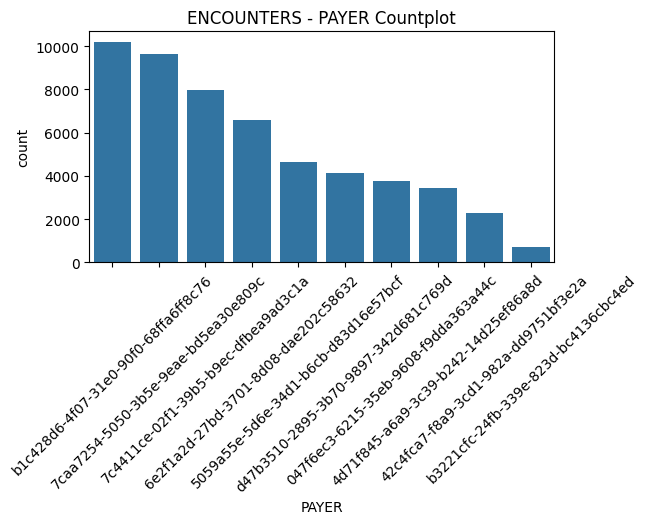

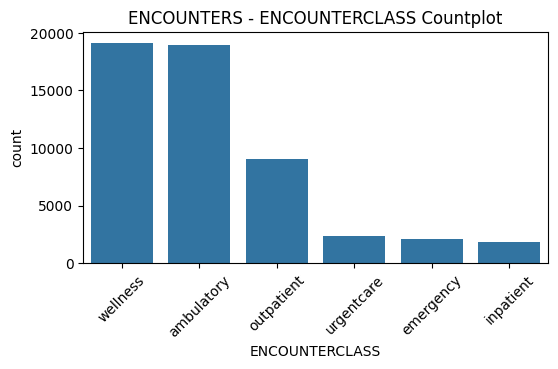


===== EDA for ALLERGIES =====
Shape: (597, 6)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   START        597 non-null    object
 1   STOP         64 non-null     object
 2   PATIENT      597 non-null    object
 3   ENCOUNTER    597 non-null    object
 4   CODE         597 non-null    int64 
 5   DESCRIPTION  597 non-null    object
dtypes: int64(1), object(5)
memory usage: 28.1+ KB
None

Missing values:
START            0
STOP           533
PATIENT          0
ENCOUNTER        0
CODE             0
DESCRIPTION      0
dtype: int64

Descriptive statistics (numeric):
               CODE
count  5.970000e+02
mean   3.258355e+08
std    1.253216e+08
min    9.193000e+07
25%    2.323470e+08
50%    4.175320e+08
75%    4.194740e+08
max    7.140350e+08

Top 5 values for START:
START
2002-01-24    10
2014-04-24    10
1963-07-23    10
2010-04-03    10


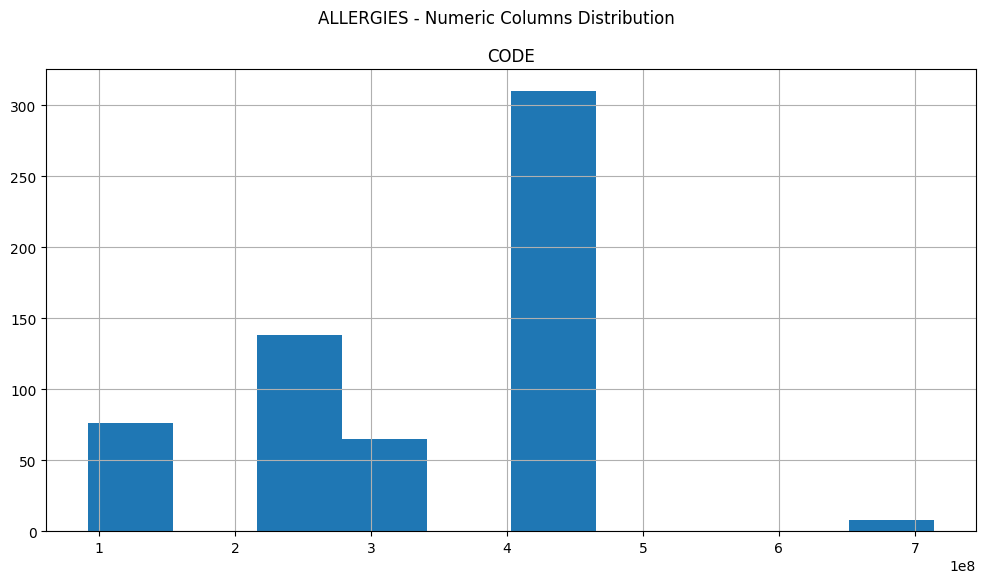

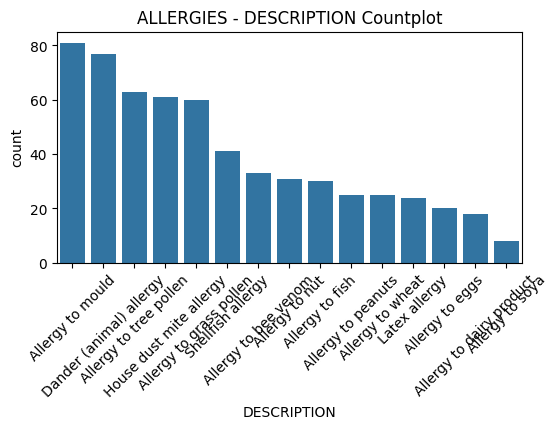


===== EDA for CAREPLANS =====
Shape: (3483, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3483 entries, 0 to 3482
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 3483 non-null   object 
 1   START              3483 non-null   object 
 2   STOP               1951 non-null   object 
 3   PATIENT            3483 non-null   object 
 4   ENCOUNTER          3483 non-null   object 
 5   CODE               3483 non-null   int64  
 6   DESCRIPTION        3483 non-null   object 
 7   REASONCODE         3156 non-null   float64
 8   REASONDESCRIPTION  3156 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 245.0+ KB
None

Missing values:
Id                      0
START                   0
STOP                 1532
PATIENT                 0
ENCOUNTER               0
CODE                    0
DESCRIPTION             0
REASONCODE            327
REASONDESCRIPTION

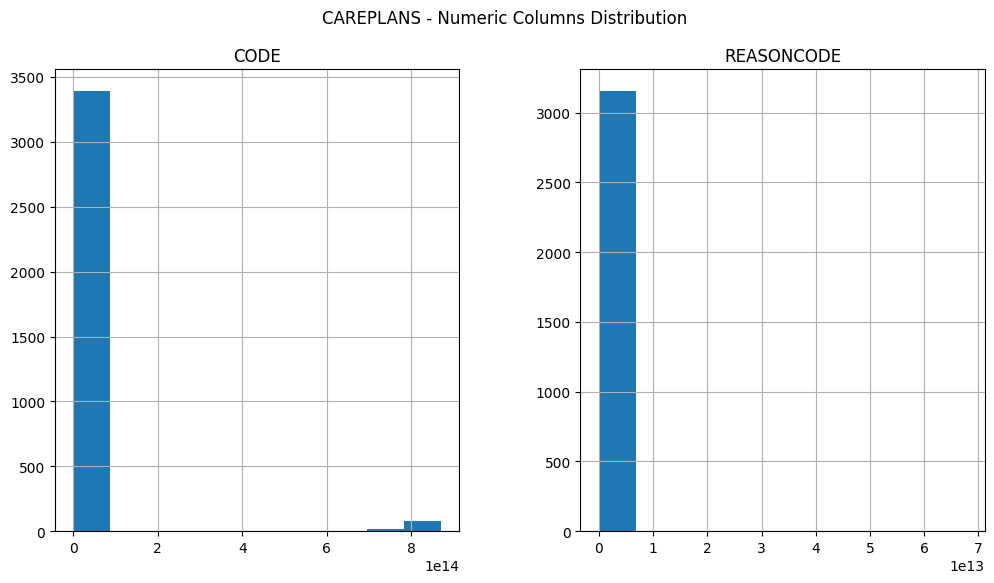


===== EDA for IMMUNIZATIONS =====
Shape: (15478, 6)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15478 entries, 0 to 15477
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         15478 non-null  object 
 1   PATIENT      15478 non-null  object 
 2   ENCOUNTER    15478 non-null  object 
 3   CODE         15478 non-null  int64  
 4   DESCRIPTION  15478 non-null  object 
 5   BASE_COST    15478 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 725.7+ KB
None

Missing values:
DATE           0
PATIENT        0
ENCOUNTER      0
CODE           0
DESCRIPTION    0
BASE_COST      0
dtype: int64

Descriptive statistics (numeric):
               CODE     BASE_COST
count  15478.000000  1.547800e+04
mean     112.320649  1.405200e+02
std       45.165658  1.583140e-11
min        3.000000  1.405200e+02
25%      113.000000  1.405200e+02
50%      140.000000  1.405200e+02
75%      140.000000  1

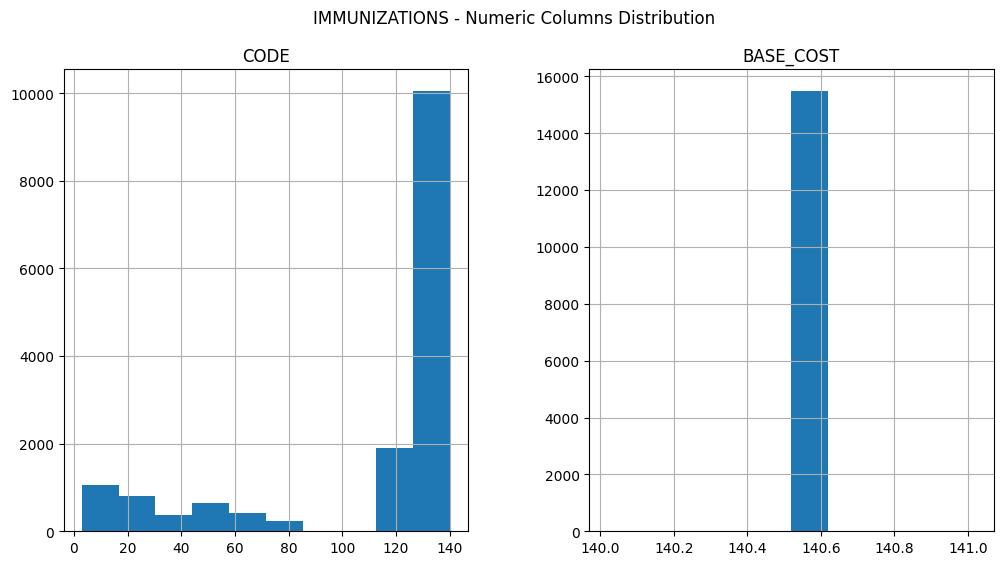

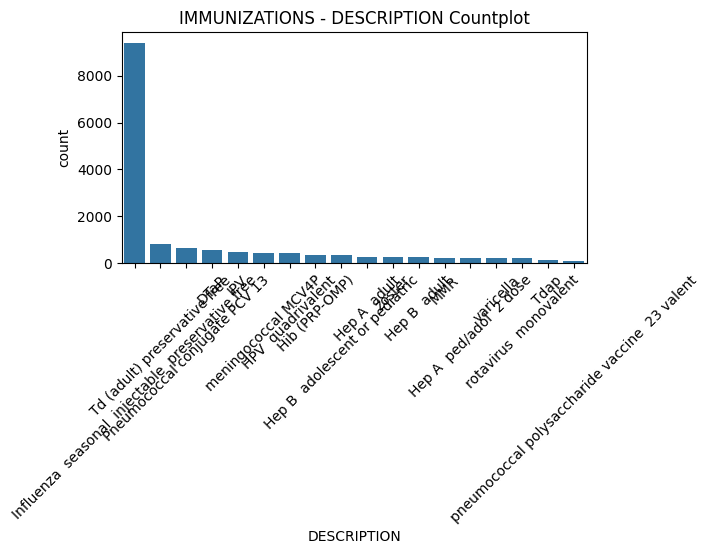


===== EDA for PROCEDURES =====
Shape: (34981, 8)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34981 entries, 0 to 34980
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DATE               34981 non-null  object 
 1   PATIENT            34981 non-null  object 
 2   ENCOUNTER          34981 non-null  object 
 3   CODE               34981 non-null  int64  
 4   DESCRIPTION        34981 non-null  object 
 5   BASE_COST          34981 non-null  float64
 6   REASONCODE         19437 non-null  float64
 7   REASONDESCRIPTION  19437 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.1+ MB
None

Missing values:
DATE                     0
PATIENT                  0
ENCOUNTER                0
CODE                     0
DESCRIPTION              0
BASE_COST                0
REASONCODE           15544
REASONDESCRIPTION    15544
dtype: int64

Descriptive statistics (numeric):
       

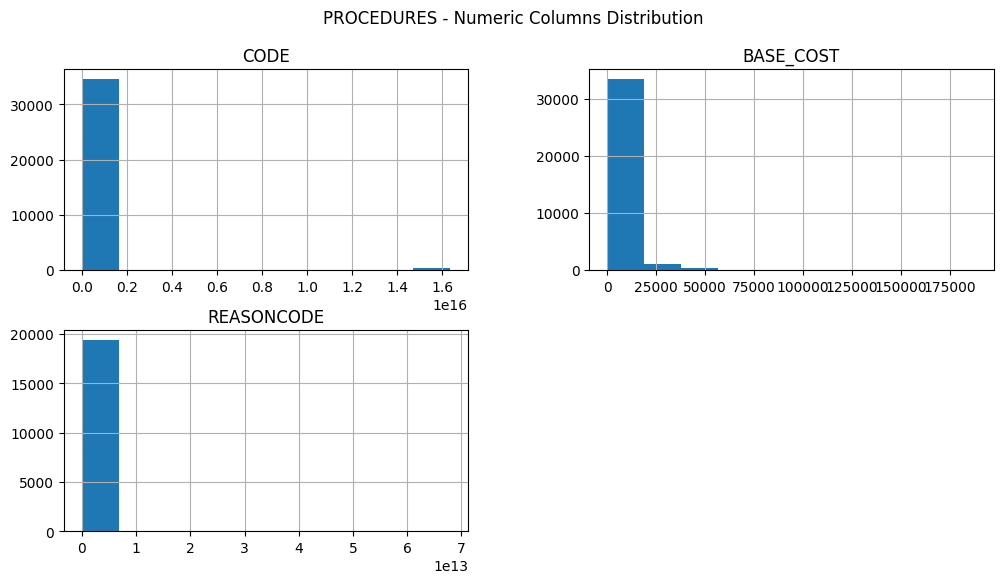

In [13]:
for name in eda_datasets:
    df = datasets[name]
    print(f"\n===== EDA for {name.upper()} =====")
    print(f"Shape: {df.shape}")

    # Basic info
    print("\nInfo:")
    print(df.info())

    # Missing values
    print("\nMissing values:")
    print(df.isna().sum())

    # Descriptive statistics
    print("\nDescriptive statistics (numeric):")
    print(df.describe())

    # Top 5 frequent categorical values
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        print(f"\nTop 5 values for {col}:")
        print(df[col].value_counts().head(5))

    # Optional: plot distributions for numeric columns
    num_cols = df.select_dtypes(include='number').columns
    if len(num_cols) > 0:
        df[num_cols].hist(figsize=(12, 6))
        plt.suptitle(f"{name.upper()} - Numeric Columns Distribution")
        plt.show()

    # Optional: plot categorical distributions
    for col in cat_cols:
        if df[col].nunique() < 20:  # only small-cardinality for clear plots
            plt.figure(figsize=(6,3))
            sns.countplot(data=df, x=col, order=df[col].value_counts().index)
            plt.title(f"{name.upper()} - {col} Countplot")
            plt.xticks(rotation=45)
            plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


## Extract features from datasets

In [15]:
# Patients: Age & Gender
df_patients['BIRTHDATE'] = pd.to_datetime(df_patients['BIRTHDATE'])
df_patients['AGE'] = (pd.Timestamp('today') - df_patients['BIRTHDATE']).dt.days // 365
patients_features = df_patients[['Id', 'AGE', 'GENDER']].copy()


In [16]:
patients_features

,Id,AGE,GENDER
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,36,M
1,034e9e3b-2def-4559-bb2a-7850888ae060,41,M
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,33,M
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,47,F
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,28,M
...,...,...,...
1166,023a7d29-32b3-4db5-89c8-b88bd7582ec0,103,F
1167,1fc8dafd-90e5-44d6-9179-81156c0ea083,48,M
1168,6d048a56-edb8-4f29-891d-7a84d75a8e78,111,F
1169,fca3178e-fb68-41c3-8598-702d3ca68b96,111,F


In [17]:
# Conditions: Hypertension/Diabetes history
# Create binary features: 1 if patient has the condition, 0 otherwise
df_conditions['Hypertension'] = df_conditions['DESCRIPTION'].str.contains('Hypertension', case=False, na=False).astype(int)
df_conditions['Diabetes'] = df_conditions['DESCRIPTION'].str.contains('Diabetes', case=False, na=False).astype(int)
cond_features = df_conditions.groupby('PATIENT')[['Hypertension', 'Diabetes']].max().reset_index()


In [18]:
cond_features

,PATIENT,Hypertension,Diabetes
0,00185faa-2760-4218-9bf5-db301acf8274,0,0
1,0042862c-9889-4a2e-b782-fac1e540ecb4,0,0
2,0047123f-12e7-486c-82df-53b3a450e365,0,0
3,010d4a3a-2316-45ed-ae15-16f01c611674,1,0
4,0149d553-f571-4e99-867e-fcb9625d07c2,0,1
...,...,...,...
1147,ff02f237-fedb-453b-85b1-ebfc2609c312,1,0
1148,ff3714ac-c7e3-4910-905e-2a321eb28144,1,0
1149,ff6948b7-3d62-4bfc-bc7d-dbb6748ed0be,0,0
1150,ffa37e71-fa14-4e84-ba9d-aece8d1d99f9,0,0


In [19]:
# Observations: Blood Pressure & Cholesterol
# Select relevant observations
obs_relevant = df_observations[df_observations['DESCRIPTION'].str.contains('Blood Pressure|Cholesterol', case=False, na=False)].copy()

# Convert VALUE to numeric (coerce errors to NaN)
obs_relevant['VALUE'] = pd.to_numeric(obs_relevant['VALUE'], errors='coerce')

# Pivot so that each patient has one row per feature, use mean for aggregation
obs_pivot = obs_relevant.pivot_table(
    index='PATIENT',
    columns='DESCRIPTION',
    values='VALUE',
    aggfunc='mean'   # mean works now as VALUE is numeric
).reset_index()

obs_pivot.columns.name = None  # remove pivot_table name


In [20]:
obs_pivot

,PATIENT,Diastolic Blood Pressure,High Density Lipoprotein Cholesterol,Low Density Lipoprotein Cholesterol,Systolic Blood Pressure,Total Cholesterol
0,00185faa-2760-4218-9bf5-db301acf8274,77.200000,NaN,NaN,121.100000,NaN
1,0042862c-9889-4a2e-b782-fac1e540ecb4,80.437500,NaN,NaN,120.187500,NaN
2,0047123f-12e7-486c-82df-53b3a450e365,77.166667,68.766667,93.833333,118.333333,186.366667
3,010d4a3a-2316-45ed-ae15-16f01c611674,81.818182,NaN,NaN,123.090909,NaN
4,01207ecd-9dff-4754-8887-4652eda231e2,77.333333,NaN,NaN,118.000000,NaN
...,...,...,...,...,...,...
1166,ff02f237-fedb-453b-85b1-ebfc2609c312,81.818182,NaN,NaN,125.272727,NaN
1167,ff3714ac-c7e3-4910-905e-2a321eb28144,83.666667,NaN,NaN,127.166667,NaN
1168,ff6948b7-3d62-4bfc-bc7d-dbb6748ed0be,80.600000,68.366667,93.133333,125.000000,186.166667
1169,ffa37e71-fa14-4e84-ba9d-aece8d1d99f9,78.666667,65.300000,78.250000,119.000000,170.550000


In [21]:
# 2. Merge datasets on PATIENT ID
# ==============================
df = patients_features.merge(cond_features, how='left', left_on='Id', right_on='PATIENT')
df = df.merge(obs_pivot, how='left', left_on='Id', right_on='PATIENT')
df.drop(columns=['PATIENT_x', 'PATIENT_y'], inplace=True)


In [22]:
# 3. Handle missing values
# ==============================
# Numeric features: fill with median
numeric_cols = ['AGE', 'Diastolic Blood Pressure', 'High Density Lipoprotein Cholesterol', 'Low Density Lipoprotein Cholesterol', 'Systolic Blood Pressure', 'Total Cholesterol']
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())


In [23]:
# Binary features: fill with 0
binary_cols = ['Hypertension', 'Diabetes']
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

In [24]:
import joblib

In [25]:
# Categorical: encode GENDER
le = LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER'])

In [26]:
joblib.dump(le, 'label_encoder_classification.pkl')

['label_encoder_classification.pkl']

In [27]:
 #4. Define target variable
# ==============================
# Example: create synthetic target for demonstration
# Here we define "high risk" if patient has Hypertension or Diabetes or age>60
df['TARGET'] = ((df['AGE']>60) | (df['Hypertension']==1) | (df['Diabetes']==1)).astype(int)


In [28]:
# Features and target
X = df.drop(columns=['Id', 'TARGET'])
y = df['TARGET']


In [29]:
X

,AGE,GENDER,Hypertension,Diabetes,Diastolic Blood Pressure,High Density Lipoprotein Cholesterol,Low Density Lipoprotein Cholesterol,Systolic Blood Pressure,Total Cholesterol
0,36,1,0.0,0.0,79.333333,68.266667,87.940909,115.666667,180.858333
1,41,1,0.0,0.0,83.250000,66.800000,78.750000,117.750000,168.050000
2,33,1,0.0,0.0,79.666667,68.266667,87.940909,116.333333,180.858333
3,47,0,0.0,0.0,80.333333,73.300000,78.100000,127.000000,175.250000
4,28,1,0.0,0.0,79.625000,68.266667,87.940909,116.500000,180.858333
...,...,...,...,...,...,...,...,...,...
1166,103,0,0.0,1.0,81.400000,57.153846,108.784615,122.400000,176.407692
1167,48,1,0.0,0.0,77.000000,69.100000,88.300000,123.400000,183.733333
1168,111,0,0.0,1.0,81.090909,67.025000,79.700000,121.454545,172.125000
1169,111,0,0.0,1.0,76.545455,67.400000,96.400000,122.363636,187.300000


In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [31]:
# Scale numeric features
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [32]:
joblib.dump(scaler, 'scaler_classification.pkl')

['scaler_classification.pkl']

In [33]:
X_train

,AGE,GENDER,Hypertension,Diabetes,Diastolic Blood Pressure,High Density Lipoprotein Cholesterol,Low Density Lipoprotein Cholesterol,Systolic Blood Pressure,Total Cholesterol
1139,0.045728,1,0.0,0.0,0.111109,0.171576,0.460926,-0.610233,0.557985
16,0.605469,0,1.0,0.0,-0.420674,0.833805,-0.003426,-0.380834,0.745375
223,-1.185702,0,0.0,0.0,-0.074799,0.171576,-0.165390,-0.159192,-0.114474
932,0.792050,0,0.0,1.0,-0.316911,-0.564570,0.678751,-0.120183,0.519921
475,-1.223018,0,0.0,0.0,-0.015712,0.171576,-0.165390,-0.809341,-0.114474
...,...,...,...,...,...,...,...,...,...
465,0.157676,0,1.0,1.0,0.046257,-0.688698,0.042936,0.408210,0.452578
292,1.277159,1,0.0,1.0,-0.253501,0.738770,0.404997,-0.473431,1.034269
883,-0.402065,0,0.0,0.0,0.561078,0.449139,0.528628,-0.166694,0.850782
842,-0.551329,0,0.0,0.0,-0.507142,0.171576,-0.165390,-0.646804,-0.114474


## 5. Train 3 classification models


In [34]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

results = {}
trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob)
    }
    trained_models[name] = model



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:08:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [35]:
# Print results to see performance
print("Model Performance:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Model Performance:

Logistic Regression:
  Accuracy: 0.9872
  F1-score: 0.9888
  AUC: 0.9998

Random Forest:
  Accuracy: 1.0000
  F1-score: 1.0000
  AUC: 1.0000

XGBoost:
  Accuracy: 1.0000
  F1-score: 1.0000
  AUC: 1.0000


In [36]:
 #Save the best model (Random Forest in your case)
best_model = trained_models["Random Forest"]
joblib.dump(best_model, 'randomforest_classification_model.pkl')

['randomforest_classification_model.pkl']

In [37]:
# 6. Compare results
# ==============================
results_df = pd.DataFrame(results).T
print(results_df)


                     Accuracy  F1-score       AUC
Logistic Regression  0.987234  0.988764  0.999779
Random Forest        1.000000  1.000000  1.000000
XGBoost              1.000000  1.000000  1.000000


## TRAINING FOR REGRESSION TASK

In [38]:
enc = df_encounters.copy()


In [39]:
# Convert dates
enc['START'] = pd.to_datetime(enc['START'], errors='coerce')
enc['STOP'] = pd.to_datetime(enc['STOP'], errors='coerce')



In [40]:
# Calculate Length of Stay (LOS) in days
enc['LOS'] = (enc['STOP'] - enc['START']).dt.days


In [41]:
# Drop rows with missing or negative LOS
enc = enc.dropna(subset=['LOS'])
enc = enc[enc['LOS'] >= 0]


In [42]:
# Outlier handling: cap LOS at 60 days
enc['LOS'] = np.where(enc['LOS'] > 60, 60, enc['LOS'])


In [43]:
# Log-transform target
enc['LOS_log'] = np.log1p(enc['LOS'])


In [44]:
enc

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,LOS,LOS_log
0,d0c40d10-8d87-447e-836e-99d26ad52ea5,2010-01-23 17:45:28+00:00,2010-01-23 18:10:28+00:00,034e9e3b-2def-4559-bb2a-7850888ae060,e002090d-4e92-300e-b41e-7d1f21dee4c6,e6283e46-fd81-3611-9459-0edb1c3da357,6e2f1a2d-27bd-3701-8d08-dae202c58632,ambulatory,185345009,Encounter for symptom,129.16,129.16,54.16,10509002.0,Acute bronchitis (disorder),0,0.0
1,e88bc3a9-007c-405e-aabc-792a38f4aa2b,2012-01-23 17:45:28+00:00,2012-01-23 18:00:28+00:00,034e9e3b-2def-4559-bb2a-7850888ae060,772ee193-bb9f-30eb-9939-21e86c8e4da5,6f1d59a7-a5bd-3cf9-9671-5bad2f351c28,6e2f1a2d-27bd-3701-8d08-dae202c58632,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN,0,0.0
2,8f104aa7-4ca9-4473-885a-bba2437df588,2001-05-01 15:02:18+00:00,2001-05-01 15:17:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,5d4b9df1-93ae-3bc9-b680-03249990e558,af01a385-31d3-3c77-8fdb-2867fe88df2f,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185345009,Encounter for symptom,129.16,129.16,0.00,36971009.0,Sinusitis (disorder),0,0.0
3,b85c339a-6076-43ed-b9d0-9cf013dec49d,2011-07-28 15:02:18+00:00,2011-07-28 15:17:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,3dc9bb2d-5d66-3e61-bf9a-e234c6433577,bb17e691-262b-3546-93d5-d88e7de93246,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),129.16,129.16,0.00,NaN,NaN,0,0.0
4,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,2010-07-27 12:58:08+00:00,2010-07-27 13:28:08+00:00,10339b10-3cd1-4ac3-ac13-ec26728cb592,b03dba4f-892f-365c-bfd1-bfcfa7a98d5d,7ed6b84a-b847-3744-9d42-15c42297a0c2,d47b3510-2895-3b70-9897-342d681c769d,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53341,bd3bfc3c-4f52-4d9c-aa01-60a084b2ddcd,2015-06-20 17:27:52+00:00,2015-06-20 17:57:52+00:00,fc817953-cc8b-45db-9c85-7c0ced8fa90d,a44b37da-aa9b-37f0-993e-26e58974e086,ff678a28-0ee8-379c-80ab-2dc790cf67dd,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN,0,0.0
53342,59727285-d30f-44e2-bcda-eac21ce07269,2016-06-25 17:27:52+00:00,2016-06-25 17:42:52+00:00,fc817953-cc8b-45db-9c85-7c0ced8fa90d,a44b37da-aa9b-37f0-993e-26e58974e086,ff678a28-0ee8-379c-80ab-2dc790cf67dd,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN,0,0.0
53343,957b13d5-49fa-4518-8c25-6eaa45e6a7d1,2017-07-01 17:27:52+00:00,2017-07-01 17:57:52+00:00,fc817953-cc8b-45db-9c85-7c0ced8fa90d,a44b37da-aa9b-37f0-993e-26e58974e086,ff678a28-0ee8-379c-80ab-2dc790cf67dd,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN,0,0.0
53344,5529a0d5-a24c-42b4-a32a-729e4d1f19ef,2018-07-07 17:27:52+00:00,2018-07-07 17:42:52+00:00,fc817953-cc8b-45db-9c85-7c0ced8fa90d,a44b37da-aa9b-37f0-993e-26e58974e086,ff678a28-0ee8-379c-80ab-2dc790cf67dd,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,NaN,0,0.0


####Step 2: Add extra features


In [45]:
# Conditions count per encounter
cond_count = df_conditions.groupby('ENCOUNTER').size().reset_index(name='cond_count')

# Procedures count per encounter
proc_count = df_procedures.groupby('ENCOUNTER').size().reset_index(name='proc_count')

# Medications count per encounter
med_count = df_medications.groupby('ENCOUNTER').size().reset_index(name='med_count')

In [46]:
cond_count

,ENCOUNTER,cond_count
0,000fef3b-ba44-4b01-952e-7eeb8a5732a8,1
1,001d66d9-b1bc-425b-a3a7-3c24de8fcb16,1
2,001ed2aa-e772-4407-9902-38ef70bd1a1e,1
3,002ad252-491e-414f-b5a1-6aa92adc6ced,1
4,003126a6-95e0-4611-9d89-8bd1d00a19d7,1
...,...,...
7645,ffdac115-eb28-4b50-be68-58e24bfac373,1
7646,ffe14dec-d1ec-442f-91b9-35eb7368d036,3
7647,ffe4fd38-fb41-49c6-872a-16e3a519b708,1
7648,ffed45fb-dc6a-4732-bc31-da489f11b418,1


In [47]:
# Merge with encounters
# Merge using encounters Id
enc = enc.merge(cond_count, left_on='Id', right_on='ENCOUNTER', how='left').drop(columns=['ENCOUNTER'])
enc = enc.merge(proc_count, left_on='Id', right_on='ENCOUNTER', how='left').drop(columns=['ENCOUNTER'])
enc = enc.merge(med_count, left_on='Id', right_on='ENCOUNTER', how='left').drop(columns=['ENCOUNTER'])


In [48]:
# Fill missing counts with 0
enc[['cond_count','proc_count','med_count']] = enc[['cond_count','proc_count','med_count']].fillna(0)

In [49]:
mode_value = enc['REASONDESCRIPTION'].mode()[0]  # Get the most frequent value
enc['REASONDESCRIPTION'] = enc['REASONDESCRIPTION'].fillna(mode_value)

In [50]:
enc.head()

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,LOS,LOS_log,cond_count,proc_count,med_count
0,d0c40d10-8d87-447e-836e-99d26ad52ea5,2010-01-23 17:45:28+00:00,2010-01-23 18:10:28+00:00,034e9e3b-2def-4559-bb2a-7850888ae060,e002090d-4e92-300e-b41e-7d1f21dee4c6,e6283e46-fd81-3611-9459-0edb1c3da357,6e2f1a2d-27bd-3701-8d08-dae202c58632,ambulatory,185345009,Encounter for symptom,129.16,129.16,54.16,10509002.0,Acute bronchitis (disorder),0,0.0,0.0,0.0,0.0
1,e88bc3a9-007c-405e-aabc-792a38f4aa2b,2012-01-23 17:45:28+00:00,2012-01-23 18:00:28+00:00,034e9e3b-2def-4559-bb2a-7850888ae060,772ee193-bb9f-30eb-9939-21e86c8e4da5,6f1d59a7-a5bd-3cf9-9671-5bad2f351c28,6e2f1a2d-27bd-3701-8d08-dae202c58632,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,Normal pregnancy,0,0.0,0.0,0.0,0.0
2,8f104aa7-4ca9-4473-885a-bba2437df588,2001-05-01 15:02:18+00:00,2001-05-01 15:17:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,5d4b9df1-93ae-3bc9-b680-03249990e558,af01a385-31d3-3c77-8fdb-2867fe88df2f,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185345009,Encounter for symptom,129.16,129.16,0.00,36971009.0,Sinusitis (disorder),0,0.0,1.0,0.0,0.0
3,b85c339a-6076-43ed-b9d0-9cf013dec49d,2011-07-28 15:02:18+00:00,2011-07-28 15:17:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,3dc9bb2d-5d66-3e61-bf9a-e234c6433577,bb17e691-262b-3546-93d5-d88e7de93246,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),129.16,129.16,0.00,NaN,Normal pregnancy,0,0.0,0.0,0.0,0.0
4,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,2010-07-27 12:58:08+00:00,2010-07-27 13:28:08+00:00,10339b10-3cd1-4ac3-ac13-ec26728cb592,b03dba4f-892f-365c-bfd1-bfcfa7a98d5d,7ed6b84a-b847-3744-9d42-15c42297a0c2,d47b3510-2895-3b70-9897-342d681c769d,wellness,162673000,General examination of patient (procedure),129.16,129.16,129.16,NaN,Normal pregnancy,0,0.0,0.0,1.0,0.0


In [51]:
# Step 3: Features + Target
# ----------------------------
features = ['ENCOUNTERCLASS', 'TOTAL_CLAIM_COST', 'PAYER_COVERAGE',
            'REASONDESCRIPTION', 'cond_count', 'proc_count', 'med_count']
target = 'LOS_log'


In [52]:
X = enc[features]
y = enc[target]

In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [54]:
# Step 4: Preprocessing
# ----------------------------
categorical = ['ENCOUNTERCLASS', 'REASONDESCRIPTION']
numeric = ['TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'cond_count', 'proc_count', 'med_count']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
        ('num', 'passthrough', numeric)
    ]
)


In [55]:
# Save the fitted preprocessor
joblib.dump(preprocessor, 'preprocessor_regression.pkl')

['preprocessor_regression.pkl']

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [57]:
# Models
# ----------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

In [58]:
results = {}


In [59]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
results_new = {}
trained_pipelines = {}  # Store trained pipelines

for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

    # Train
    pipe.fit(X_train, y_train)

    # Predict
    y_pred = pipe.predict(X_test)

    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results_new[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}
    trained_pipelines[name] = pipe  # Store the pipeline

# Print results to compare
print("Model Performance:")
for name, metrics in results_new.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

# Find and save the best model (lowest RMSE or highest R2)
best_model_name = min(results_new, key=lambda x: results_new[x]['RMSE'])
# Or use: best_model_name = max(results, key=lambda x: results[x]['R2'])

print(f"\n🏆 Best Model: {best_model_name}")

# Save the best pipeline
best_pipeline = trained_pipelines[best_model_name]
joblib.dump(best_pipeline, 'best_model_pipeline_regression.pkl')

print("✓ Best model pipeline saved successfully!")

Model Performance:

Linear Regression:
  MAE: 0.0258
  RMSE: 0.2169
  R2: 0.5040

Random Forest:
  MAE: 0.0191
  RMSE: 0.2046
  R2: 0.5586

XGBoost:
  MAE: 0.0203
  RMSE: 0.2050
  R2: 0.5568

🏆 Best Model: Random Forest
✓ Best model pipeline saved successfully!


In [61]:
# Show results
results_df = pd.DataFrame(results).T
print(results_df)


Empty DataFrame
Columns: []
Index: []


## Clustering Patients

In [62]:
patient_features = df_patients[['Id', 'BIRTHDATE', 'GENDER', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE']].copy()


In [63]:
# Convert birthdate to age
from datetime import datetime
patient_features['AGE'] = patient_features['BIRTHDATE'].apply(lambda x: (datetime.now() - pd.to_datetime(x)).days // 365)


In [64]:
# Encode Gender
patient_features['GENDER'] = patient_features['GENDER'].map({'M':0, 'F':1})


In [65]:
# Drop BIRTHDATE
patient_features.drop(columns=['BIRTHDATE'], inplace=True)

In [66]:
# ===== Step 2: Aggregate Conditions, Procedures, Medications =====
# Count of conditions per patient
cond_count = df_conditions.groupby('PATIENT').size().reset_index(name='NUM_CONDITIONS')

In [67]:
# Count of procedures per patient
proc_count = df_procedures.groupby('PATIENT').size().reset_index(name='NUM_PROCEDURES')

# Count of medications per patient
med_count = df_medications.groupby('PATIENT').size().reset_index(name='NUM_MEDICATIONS')

In [68]:
# Merge all counts into patient_features
patient_features = patient_features.merge(cond_count, left_on='Id', right_on='PATIENT', how='left')
patient_features = patient_features.merge(proc_count, left_on='Id', right_on='PATIENT', how='left')
patient_features = patient_features.merge(med_count, left_on='Id', right_on='PATIENT', how='left')

In [69]:
# Fill NaN counts with 0
patient_features[['NUM_CONDITIONS','NUM_PROCEDURES','NUM_MEDICATIONS']] = patient_features[['NUM_CONDITIONS','NUM_PROCEDURES','NUM_MEDICATIONS']].fillna(0)

In [70]:
# Drop duplicate PATIENT columns
patient_features.drop(columns=['PATIENT_x','PATIENT_y','PATIENT'], inplace=True, errors='ignore')

In [71]:
# ===== Step 3: Feature Scaling =====
features_to_cluster = ['AGE','GENDER','HEALTHCARE_EXPENSES','HEALTHCARE_COVERAGE','NUM_CONDITIONS','NUM_PROCEDURES','NUM_MEDICATIONS']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(patient_features[features_to_cluster])


In [72]:
# Save the scaler and feature list
joblib.dump(scaler, 'scaler_clustering.pkl')
joblib.dump(features_to_cluster, 'features_to_cluster.pkl')

['features_to_cluster.pkl']

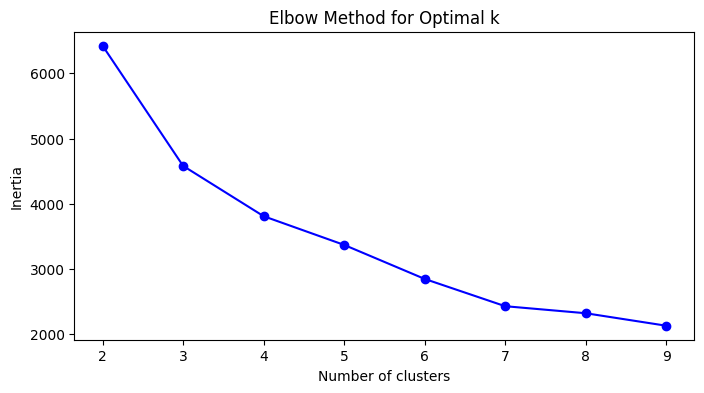

In [73]:
from sklearn.cluster import KMeans
# ===== Step 4: Determine optimal number of clusters (Elbow method) =====
inertia = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [74]:
# ===== Step 5: Apply KMeans with chosen k =====
optimal_k = 5  # Choose based on Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
patient_features['COST_CLUSTER'] = kmeans.fit_predict(X_scaled)


In [75]:
# Save the KMeans model
joblib.dump(kmeans, 'kmeans_model_clustering.pkl')
joblib.dump(optimal_k, 'optimal_k_clustering.pkl')

['optimal_k_clustering.pkl']

In [76]:
# ===== Step 6: Analyze clusters =====
cluster_summary = patient_features.groupby('COST_CLUSTER')[['AGE','HEALTHCARE_EXPENSES','HEALTHCARE_COVERAGE','NUM_CONDITIONS','NUM_PROCEDURES','NUM_MEDICATIONS']].mean()
print(cluster_summary)

                     AGE  HEALTHCARE_EXPENSES  HEALTHCARE_COVERAGE  NUM_CONDITIONS  NUM_PROCEDURES  NUM_MEDICATIONS
COST_CLUSTER                                                                                                       
0              63.865248         7.937931e+05         42561.289433       14.191489       88.141844       110.035461
1              35.036723         4.566212e+05          4266.900424        4.720339        8.282486        11.000000
2              74.236413         1.373982e+06         12137.805543        8.024457       14.641304        36.894022
3             108.333333         1.912367e+06        514552.360000       18.666667     1252.000000      2159.333333
4              30.006557         3.633261e+05          5318.824623        5.557377       34.350820        11.557377


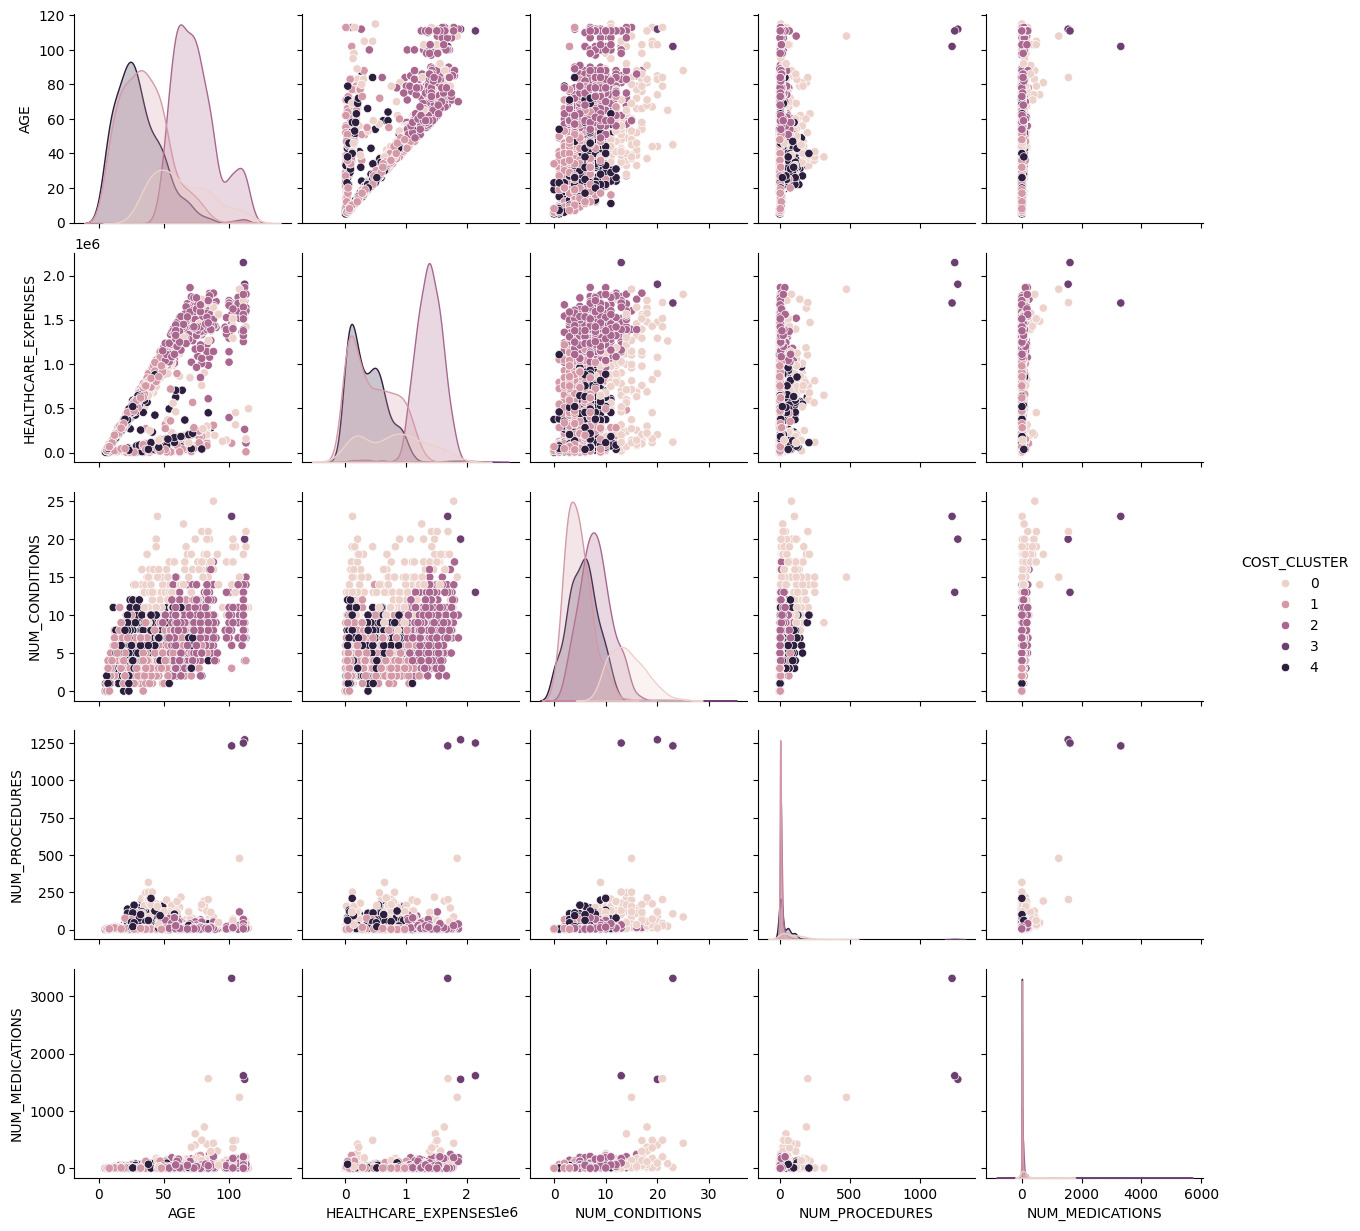

In [77]:
# ===== Step 7: Optional visualization =====
sns.pairplot(patient_features, hue='COST_CLUSTER', vars=['AGE','HEALTHCARE_EXPENSES','NUM_CONDITIONS','NUM_PROCEDURES','NUM_MEDICATIONS'])
plt.show()


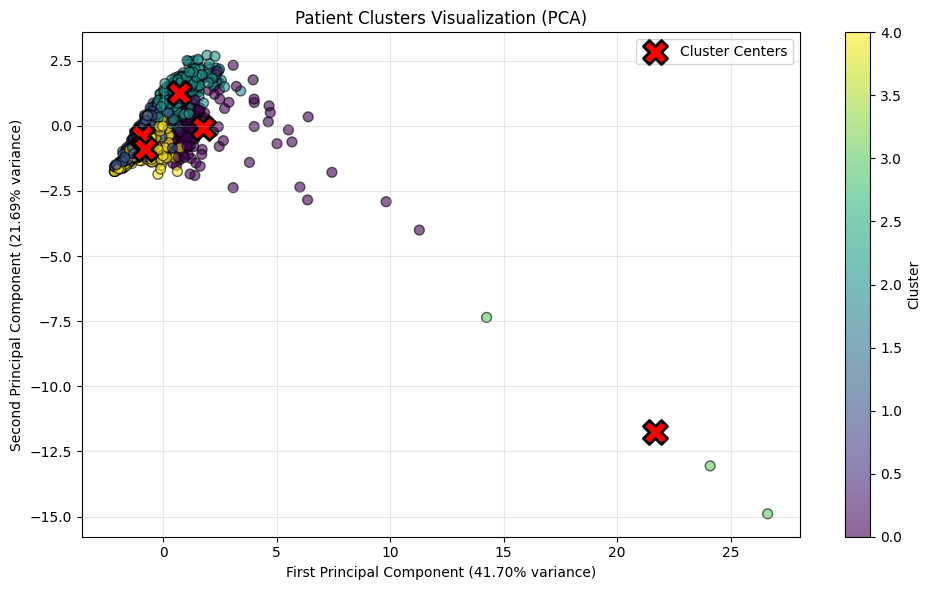

Total variance explained by 2 components: 63.40%


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create the plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=patient_features['COST_CLUSTER'],
                     cmap='viridis',
                     alpha=0.6,
                     edgecolors='black',
                     s=50)

plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('Patient Clusters Visualization (PCA)')
plt.grid(True, alpha=0.3)

# Add cluster centers
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
           c='red', marker='X', s=300,
           edgecolors='black', linewidths=2,
           label='Cluster Centers')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Total variance explained by 2 components: {sum(pca.explained_variance_ratio_):.2%}")

In [79]:
import plotly.express as px

# Create PCA for plotly
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

plot_df = pd.DataFrame({
    'PC1': X_pca_3d[:, 0],
    'PC2': X_pca_3d[:, 1],
    'PC3': X_pca_3d[:, 2],
    'Cluster': patient_features['COST_CLUSTER'].astype(str),
    'Age': patient_features['AGE'],
    'Expenses': patient_features['HEALTHCARE_EXPENSES']
})

fig = px.scatter_3d(plot_df, x='PC1', y='PC2', z='PC3',
                    color='Cluster',
                    hover_data=['Age', 'Expenses'],
                    title='Interactive 3D Cluster Visualization')
fig.show()

## Association Rules

In [80]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [81]:
# 1️⃣ Select top N items per category
# ===============================
top_n = 20  # reduced to speed up processing
top_conditions = df_conditions['DESCRIPTION'].value_counts().head(top_n).index
top_medications = df_medications['DESCRIPTION'].value_counts().head(top_n).index
top_procedures = df_procedures['DESCRIPTION'].value_counts().head(top_n).index

In [82]:
# Filter datasets
cond_small = df_conditions[df_conditions['DESCRIPTION'].isin(top_conditions)]
med_small = df_medications[df_medications['DESCRIPTION'].isin(top_medications)]
proc_small = df_procedures[df_procedures['DESCRIPTION'].isin(top_procedures)]

In [83]:
# 2️⃣ Combine datasets
# ===============================
combined_df = pd.concat([cond_small[['PATIENT','DESCRIPTION']],
                         med_small[['PATIENT','DESCRIPTION']],
                         proc_small[['PATIENT','DESCRIPTION']]])


In [84]:
# 3️⃣ Create list of items per patient (memory-efficient)
# ===============================
transactions = combined_df.groupby('PATIENT')['DESCRIPTION'].apply(list).tolist()

In [85]:
# 4️⃣ One-hot encode transactions using TransactionEncoder (sparse)
# ===============================
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions, sparse=True)
transaction_df = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)

/tmp/ipython-input-367871467.py:5: FutureWarning:

Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.



In [86]:
# 5️⃣ Run FP-Growth
# ===============================
frequent_itemsets = fpgrowth(transaction_df, min_support=0.05, use_colnames=True)

In [87]:
# 6️⃣ Generate association rules
# ===============================
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)

In [88]:
 # 7️⃣ Sort by lift and display top rules
# ===============================
rules = rules.sort_values(by='lift', ascending=False)
print(rules.head(10))


                                               antecedents                                        consequents  antecedent support  \
3638200        (Metabolic syndrome X (disorder), Diabetes)                  (Hypertriglyceridemia (disorder))            0.063356   
3638298  (Metabolic syndrome X (disorder), Medication R...  (Anemia (disorder), Diabetes, Hypertriglycerid...            0.063356   
3638288  (Metabolic syndrome X (disorder), Diabetes, Me...  (Anemia (disorder), Hypertriglyceridemia (diso...            0.063356   
3638299  (Hypertriglyceridemia (disorder), Medication R...  (Metabolic syndrome X (disorder), Anemia (diso...            0.063356   
3638230  (Medication Reconciliation (procedure), Metabo...                  (Hypertriglyceridemia (disorder))            0.063356   
3638231  (Diabetes, Hypertriglyceridemia (disorder), Me...                  (Metabolic syndrome X (disorder))            0.063356   
3638289  (Diabetes, Hypertriglyceridemia (disorder), Me...  (Anemia (